## Introduction to text analysis X ##

*Revision 2019*

**Using sentiment analyzer**

In this notebook we explore the features of the vader sentiment analyzer for the English language (specialized in short text like tweets) 

Install the tool from here

https://github.com/cjhutto/vaderSentiment
    
using the pip

pip3 install vaderSentiment

**vader sentiment ... the best in town**

In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd

In [4]:
tweet_positive = "/home/mick/nltk_data/corpora/twitter_samples/positive_tweets.json"
tweet_negative = "/home/mick/nltk_data/corpora/twitter_samples/negative_tweets.json"

remember to download data

In [6]:
dfpos = pd.read_json(tweet_positive,lines=True,orient='records')
dfneg = pd.read_json(tweet_negative,lines=True,orient='records')

**initialize the sentiment analyzer**

In [8]:
analyzer = SentimentIntensityAnalyzer()

In [10]:
tweetPosSentiment = {}
sentiment = []
for tweet in list(dfpos.text):
    vs = analyzer.polarity_scores(tweet)
    #print("{:-<65} {}".format(tweet, str(vs)))
    tweetPosSentiment[tweet] = vs['compound']

the 'compound' sentiment is an average of positive and negative for the entire sentence

In [11]:
pd.Series(list(tweetPosSentiment.values())).describe()

count    5000.00000
mean        0.57887
std         0.30672
min        -0.95760
25%         0.45880
50%         0.65970
75%         0.80200
max         0.98720
dtype: float64

visualize the distribution of positive sentiment

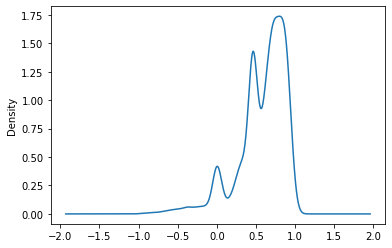

In [12]:
pd.Series(list(tweetPosSentiment.values())).plot(kind='density')

In [13]:
tweetNegSentiment = {}

for tweet in list(dfneg.text):
    vs = analyzer.polarity_scores(tweet)
    #print("{:-<65} {}".format(tweet, str(vs)))
    tweetNegSentiment[tweet] = vs['compound']

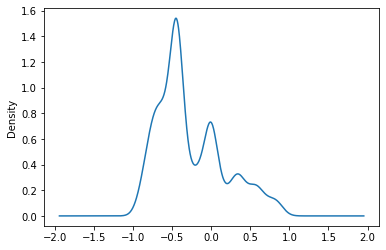

In [14]:
pd.Series(list(tweetNegSentiment.values())).plot(kind='kde')

**Negative/positive comparison**

In [15]:
ns = pd.Series(list(tweetNegSentiment.values()))
ps = pd.Series(list(tweetPosSentiment.values()))

Text(0.5, 1.0, 'Negative/Positive tweet distribution')

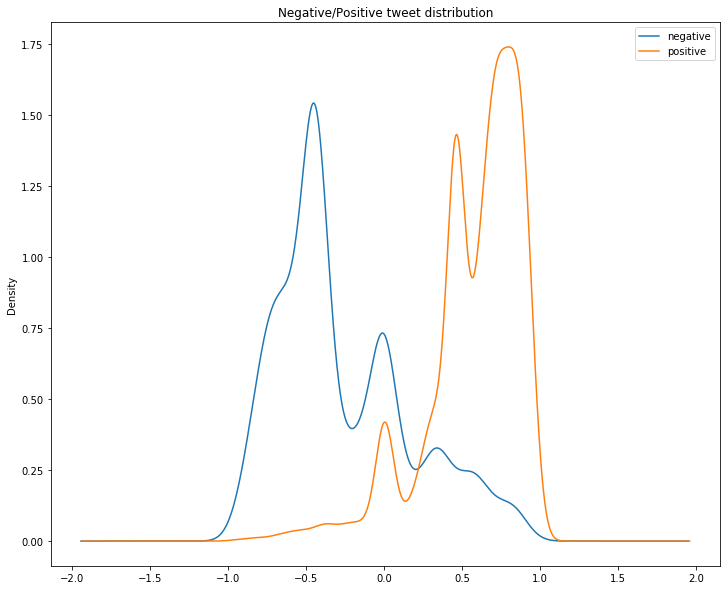

In [16]:
fig = plt.figure(figsize=(12,10))
ax = plt.gca()
ns.plot(kind='kde',ax = ax)
ps.plot(kind='kde',ax = ax)
ax.legend(['negative','positive'])
ax.set_title('Negative/Positive tweet distribution')


polarity as expected is slightly biased toward positive mood

### Working with polyglot ###

Useful libraries

In [19]:
import polyglot

In [20]:
arabic_text = u"""
أفاد مصدر امني في قيادة عمليات صلاح الدين في العراق بأن " القوات الامنية تتوقف لليوم
الثالث على التوالي عن التقدم الى داخل مدينة تكريت بسبب
انتشار قناصي التنظيم الذي يطلق على نفسه اسم "الدولة الاسلامية" والعبوات الناسفة
والمنازل المفخخة والانتحاريين، فضلا عن ان القوات الامنية تنتظر وصول تعزيزات اضافية ".
"""

In [23]:
from polyglot.detect import Detector

In [24]:
dt = Detector(arabic_text)
print(dt.language)

name: arabo       code: ar       confidence:  99.0 read bytes:   907


Polyglot has several corpus related to sentiment analysis

In [26]:
from polyglot.downloader import downloader
print(downloader.supported_languages_table("sentiment2", 3))

  1. Kapampangan                2. Italian                    3. Upper Sorbian            
  4. Sakha                      5. Hindi                      6. French                   
  7. Spanish; Castilian         8. Vietnamese                 9. Arabic                   
 10. Macedonian                11. Pashto, Pushto            12. Bosnian-Croatian-Serbian 
 13. Egyptian Arabic           14. Norwegian Nynorsk         15. Sundanese                
 16. Sicilian                  17. Azerbaijani               18. Bulgarian                
 19. Yoruba                    20. Tajik                     21. Georgian                 
 22. Tatar                     23. Galician                  24. Malagasy                 
 25. Uighur, Uyghur            26. Amharic                   27. Venetian                 
 28. Yiddish                   29. Norwegian                 30. Alemannic                
 31. Estonian                  32. West Flemish              33. Divehi; Dhivehi; Mald... 

Text preprocessor

In [28]:
from polyglot.text import Text as T

In [33]:
tweetNegSentimentP = {}

for tweet in list(dfneg.text):
    vs = T(tweet,hint_language_code='en')
    #break
    #print("{:-<65} {}".format(tweet, str(vs)))
    try:
        tweetNegSentimentP[tweet] = vs.polarity
    except Exception as e:

        
        pass

not really accurate !

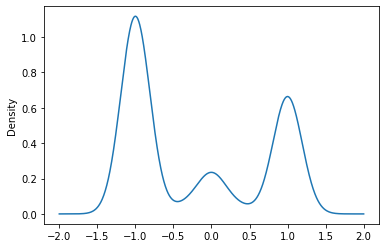

In [34]:
pd.Series(list(tweetNegSentimentP.values())).plot(kind='kde')

In [35]:
pd.Series(list(tweetNegSentimentP.values())).describe()

count    2320.000000
mean       -0.218578
std         0.901244
min        -1.000000
25%        -1.000000
50%        -1.000000
75%         1.000000
max         1.000000
dtype: float64

**Test for Italian language**

In [39]:
st = "il film era molto bello"

In [40]:
dr = T(st,hint_language_code='it')

In [41]:
dr.polarity

1.0

In [42]:
st = "il film non era molto bello"

In [43]:
dr = T(st,hint_language_code='it')
dr.polarity

1.0

In [44]:
st = "il film non era bello"
dr = T(st,hint_language_code='it')
dr.polarity

1.0

**English ...**

In [45]:
e = "The movie was good"
dr = T(e,hint_language_code='en')
dr.polarity


1.0

In [46]:
e = "The movie was awful"
dr = T(e,hint_language_code='en')
dr.polarity


-1.0

In [47]:
e = "The movie was not good"
dr = T(e,hint_language_code='en')
dr.polarity


1.0

In [48]:
vs = analyzer.polarity_scores(e)

In [49]:
vs['compound']

-0.3412

In [50]:
vs = analyzer.polarity_scores("The movie was awful")
vs['compound']

-0.4588

In [51]:
vs = analyzer.polarity_scores("The movie was shit")
vs['compound']

-0.5574

In [52]:
vs = analyzer.polarity_scores("The movie was absolute a shit")
vs['compound']

-0.5574

**translate approach**

much better !

In [54]:
from googletrans import Translator
translator = Translator()


In [55]:
st = "il film non era bello"
toeng = translator.translate(st)
print(toeng)

Translated(src=it, dest=en, text=the film was not nice, pronunciation=the film was not nice, extra_data="{'translat...")


In [56]:
print(toeng.text)

the film was not nice


In [57]:
vs = analyzer.polarity_scores(toeng.text)
vs['compound']

-0.3252

In [58]:
st = "il film era pessimo"
toeng = translator.translate(st)
vs = analyzer.polarity_scores(toeng.text)
print(vs['compound'])
print(toeng)

-0.5423
Translated(src=it, dest=en, text=the film was bad, pronunciation=the film was bad, extra_data="{'translat...")


In [60]:
st = "il film era una cagata"
toeng = translator.translate(st)
vs = analyzer.polarity_scores(toeng.text)
print(vs['compound'])
print(toeng)

-0.3818
Translated(src=it, dest=en, text=the film was a crap, pronunciation=the film was a crap, extra_data="{'translat...")


In [61]:
st = "il film era davvero bello"
toeng = translator.translate(st)
vs = analyzer.polarity_scores(toeng.text)
print(vs['compound'])
print(toeng)

0.4754
Translated(src=it, dest=en, text=the film was really nice, pronunciation=the film was really nice, extra_data="{'translat...")


### Exercises ###

* Explore the world of sentiment analysis with various tools (vader vs polyglot)
* Try the translation approach as a reference, explore the limits of the google translate interface (rate limits) and propose a solution to get more translations (batch processing)

